In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

# Patient 8 THY

## 3M Littmann Data

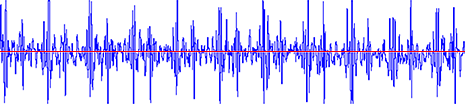

In [33]:
image = Image.open('3M_shz.bmp')
image

In [34]:
x = image.size[0]
y = image.size[1]

In [35]:
print(x)
print(y)

465
104


In [36]:
matrix = []
points = []
integrated_density = 0

for i in range(x):
    matrix.append([])
    for j in range(y):
        matrix[i].append(image.getpixel((i,j)))
        #integrated_density += image.getpixel((i,j))[1]
        #points.append(image.getpixel((i,j))[1])

### Extract Red Line Position

In [37]:
redMax = 0
xStore = 0
yStore = 0
for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        if currentPoint[0] == 255 and currentPoint[1] < 10 and currentPoint[2] < 10:
            redMax = currentPoint[0]
            xStore = xAxis
            yStore = yAxis
            
print(xStore, yStore)

464 51


### Extract Blue Points

In [38]:
redline_pos = 51
gain = 60
absMax = 0
littmannArr = []
points_vertical = []
theOne = 0

for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        # Pickup Blue points
        if currentPoint[2] == 255 and currentPoint[0] < 100 and currentPoint[1] < 100:
            points_vertical.append(yAxis)
            
    #print(points_vertical)
    
    
    # Choose the largest amplitude
    for item in points_vertical:
        
        if abs(item-redline_pos) > absMax:
            absMax = abs(item-redline_pos)
            theOne = item 
    littmannArr.append((theOne-redline_pos)*gain)
    
    absMax = 0  
    theOne = 0
    points_vertical = []

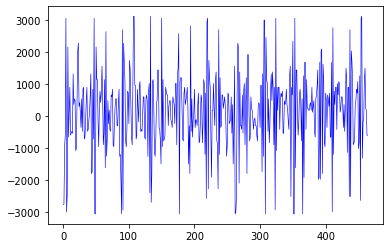

In [39]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

# Ascul Pi Data

In [40]:
pathBase = 'C://Users//triti//OneDrive//Dowrun//Text//Manuscripts//Data//SunHongzhi//AusculPi//'
filename = 'Numpy_Array_File_2020-07-09_12_41_52.npy'
line = pathBase + filename
arr = np.load(line)
arr

array([[  151,   156,   115, ...,   266,   438,   600],
       [  678,   729,   766, ...,   686,   584,   477],
       [  388,   275,   225, ...,   357,   334,   300],
       ...,
       [ 6411,  6402,  6415, ...,  4825,  4896,  4960],
       [25224, -7502, -7441, ..., 12310, 12378, 12457],
       [12517, 12575, 12633, ..., 24285, 24334, 24346]], dtype=int16)

In [41]:
arr.shape

(2583, 512)

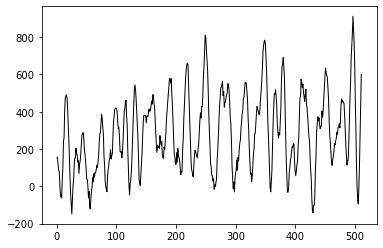

In [42]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[0], linewidth=1.0, color='black')

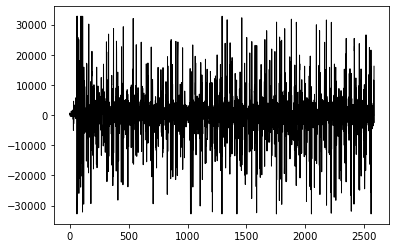

In [43]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[:,200], linewidth=1.0, color='black')

In [44]:
start = 1760
end = 2300

start_adj = int(start * 2583 / 3000)
end_adj = int(end * 2583 / 3000)

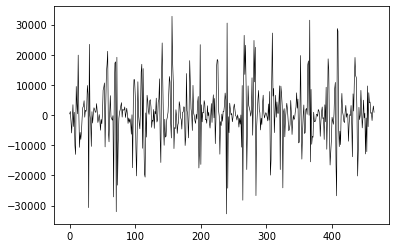

In [45]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[start_adj:end_adj,220], linewidth=0.6, color='black')

In [46]:
start_adj-end_adj

-465

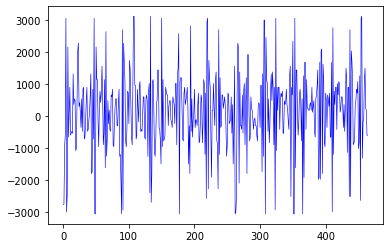

In [47]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

In [48]:
asculArr = arr[start_adj:end_adj,220]

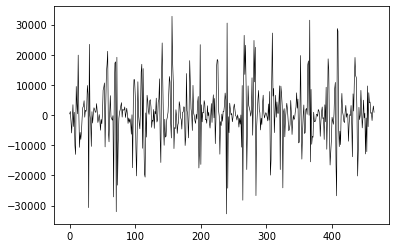

In [49]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr, linewidth=0.6, color='black')

## Preprocess the two array

In [50]:
asculArr_processed = []
littmannArr_processed = []

for ascul in asculArr:
    asculArr_processed.append(math.fabs(ascul))
    
for item in littmannArr:
    littmannArr_processed.append(math.fabs(item))

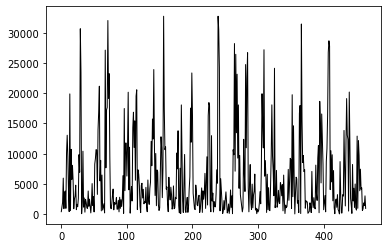

In [51]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr_processed, linewidth=1.0, color='black')

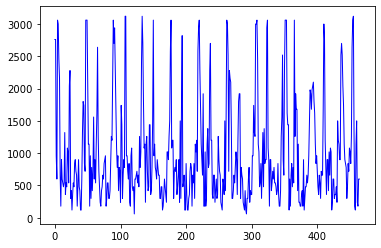

In [52]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr_processed, linewidth=1.0, color='blue')

In [53]:
len(littmannArr)

465

In [54]:
len(asculArr)

465

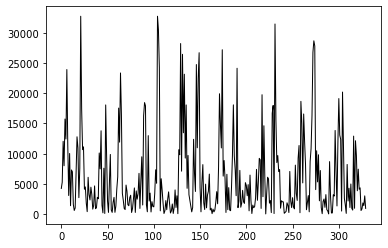

In [55]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr_processed[135:465], linewidth=1.0, color='black')

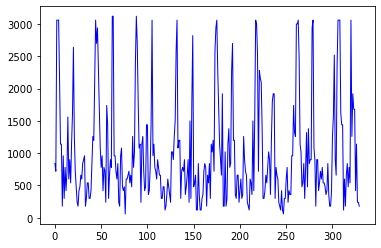

In [56]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr_processed[45:375], linewidth=1.0, color='blue')

### Coeffient

In [57]:
stats.pearsonr(asculArr_processed, littmannArr_processed)

(0.0843769797537507, 0.0690887537571835)

In [58]:
stats.pearsonr(asculArr_processed[130:460], littmannArr_processed[40:370])

(0.32052019283660516, 2.547637098550317e-09)

In [59]:
stats.pearsonr(asculArr_processed[135:465], littmannArr_processed[45:375])

(0.3274179835102269, 1.1007971324031915e-09)

### Fitness

In [60]:
stats.chisquare(asculArr_processed[:80], littmannArr_processed[2:82])

Power_divergenceResult(statistic=13084480.095149577, pvalue=0.0)

In [61]:
def cosCalculate(a, b):
    l = len(a)
    
    sumXY = 0
    sumRootXSquare = 0
    sumRootYSquare = 0
    
    for i in range(l):
        sumXY = sumXY + a[i]*b[i]
        sumRootXSquare = sumRootXSquare + math.sqrt(a[i]**2)
        sumRootYSquare = sumRootYSquare + math.sqrt(b[i]**2)
        
    cosValue = sumXY / (sumRootXSquare * sumRootYSquare)
    
    return cosValue    

In [62]:
cosCalculate(asculArr_processed, littmannArr_processed)

0.0023121655314669687